In [31]:
import pandas as pd
import datetime
import numpy as np
from sqlalchemy import create_engine
import numpy as np
import matplotlib.pyplot as plt
from config import pw
# from sqlalchemy import 

In [2]:
url = "https://raw.githubusercontent.com/ahyds/ETL_project/master/Resources/Van-data%202014-2018.csv"
van_data = pd.read_csv(url)

In [3]:
van_data.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
0,Mischief,2014,11,15,1.0,13.0,21XX MAIN ST,Mount Pleasant,492656.74,5457064.58
1,Mischief,2014,10,30,20.0,40.0,21XX MAIN ST,Mount Pleasant,492674.67,5457023.50
2,Theft from Vehicle,2014,3,7,12.0,0.0,3XX E 19TH AVE,Riley Park,492836.77,5455675.23
3,Break and Enter Residential/Other,2014,4,7,10.0,43.0,45XX NANAIMO ST,Kensington-Cedar Cottage,495871.83,5454606.75
4,Mischief,2014,12,15,0.0,0.0,21XX MAIN ST,Mount Pleasant,492675.64,5457056.73


In [4]:
new_van_data = van_data[['TYPE', 'YEAR', 'MONTH','HOUR']].copy()
new_van_data.head(10)

,TYPE,YEAR,MONTH,HOUR
0,Mischief,2014,11,1.0
1,Mischief,2014,10,20.0
2,Theft from Vehicle,2014,3,12.0
3,Break and Enter Residential/Other,2014,4,10.0
4,Mischief,2014,12,0.0
5,Theft from Vehicle,2014,12,1.0
6,Break and Enter Commercial,2014,8,10.0
7,Offence Against a Person,2014,11,NaN
8,Theft from Vehicle,2014,7,21.0
9,Break and Enter Residential/Other,2014,12,2.0


In [5]:
new_van_data['TYPE'] = new_van_data['TYPE'].replace({'Theft from Vehicle':'Other Theft','Mischief':'Assault','Break and Enter Residential/Other':'Break and Enter','Theft of Bicycle':'Other Theft',
                                                     'Break and Enter Commercial':'Break and Enter','Vehicle Collision or Pedestrian Struck (with Injury)':'Traffic','Theft of Vehicle':'Auto Theft',
                                                     'Vehicle Collision or Pedestrian Struck (with Fatality)':'Traffic','Offence Against a Person':'Assault'})

In [6]:
new_van_data.dtypes

TYPE      object
YEAR       int64
MONTH      int64
HOUR     float64
dtype: object

In [7]:
#new_van_data.loc[(new_van_data['HOUR'] == 'NaN') , "TIME"] = 'NaN'
new_van_data.loc[(new_van_data['HOUR'] >= 6) & (new_van_data['HOUR'] < 18), "TIME"] = 'DAY'
new_van_data.loc[(new_van_data['HOUR'] >= 18) | (new_van_data['HOUR'] < 6), "TIME"] = 'NIGHT'

new_van_data.head(10)

,TYPE,YEAR,MONTH,HOUR,TIME
0,Assault,2014,11,1.0,NIGHT
1,Assault,2014,10,20.0,NIGHT
2,Other Theft,2014,3,12.0,DAY
3,Break and Enter,2014,4,10.0,DAY
4,Assault,2014,12,0.0,NIGHT
5,Other Theft,2014,12,1.0,NIGHT
6,Break and Enter,2014,8,10.0,DAY
7,Assault,2014,11,NaN,NaN
8,Other Theft,2014,7,21.0,NIGHT
9,Break and Enter,2014,12,2.0,NIGHT


In [8]:
year_count = new_van_data[['YEAR','TYPE']].groupby ('YEAR').count()
year_count = year_count.rename(columns={"TYPE":"CRIME COUNT"})
year_count

,CRIME COUNT
YEAR,
2014,32664
2015,34344
2016,37827
2017,36976
2018,38045


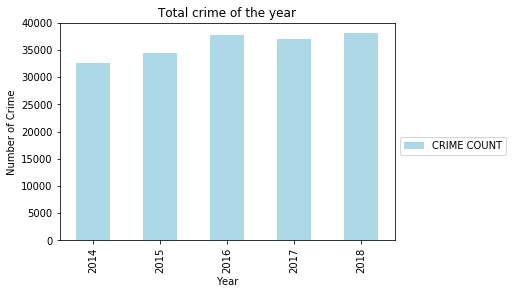

In [9]:
crime_count_yr = year_count.plot(kind='bar',color='lightblue',label="Total crime of the year")

crime_count_yr.set_xlabel("Year")
crime_count_yr.set_ylabel("Number of Crime")
plt.title("Total crime of the year")

plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.savefig("Images/crime_count_yr.jpg",bbox_inches = "tight")
plt.show()

In [10]:
month_mean = new_van_data[['TYPE','YEAR','MONTH']].groupby(['MONTH','YEAR']).count()
month_mean = month_mean['TYPE'].groupby(['MONTH']).mean()
month_mean = pd.DataFrame(month_mean)
month_mean = month_mean.rename(columns={"TYPE":"AVERAGE CRIME COUNT"})
month_mean

,AVERAGE CRIME COUNT
MONTH,
1,2891.6
2,2496.4
3,2844.8
4,2831.4
5,3058.6
6,3050.2
7,3241.8
8,3237.0
9,3110.8


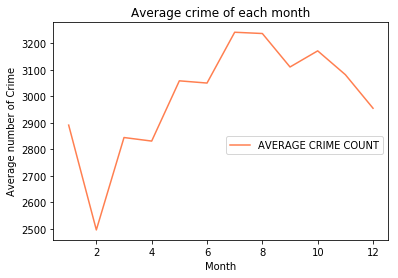

In [11]:
crime_month_avg = month_mean.plot(kind='line',color='coral',label="Average crime of each month")

crime_month_avg.set_xlabel("Month")
crime_month_avg.set_ylabel("Average number of Crime")
plt.title("Average crime of each month")

plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.savefig("Images/crime_month_avg.jpg",bbox_inches = "tight")
plt.show()

In [12]:
day_night = new_van_data[['TYPE','TIME']].groupby(['TIME']).count()
day_night = day_night.rename(columns={"TYPE":"COUNT"})
day_night

,COUNT
TIME,
DAY,80613
NIGHT,83270


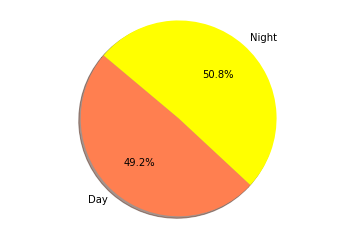

In [13]:
labels = 'Day', 'Night'
sizes = [80613,83270]
colors=['coral','yellow']

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")

plt.savefig("Images/day_night.png")
plt.show()

In [14]:
type_count = new_van_data['TYPE'].value_counts()
type_count = pd.DataFrame(type_count)
type_count = type_count.rename(columns={"TYPE":"COUNT"})
type_count

,COUNT
Other Theft,99008
Assault,40350
Break and Enter,25629
Traffic,8013
Auto Theft,6789
Homicide,67


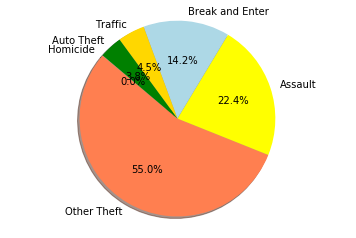

In [15]:
labels = 'Other Theft', 'Assault','Break and Enter','Traffic','Auto Theft','Homicide'
sizes = [99008,40350,25629,8013,6789,67]
colors=['coral','yellow','lightblue','gold','green','pink']

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")

plt.savefig("Images/type_count_pie.png")
plt.show()

In [16]:
new_van_data = new_van_data[['TYPE', 'YEAR', 'MONTH','TIME']].copy()
new_van_data['ID'] = np.arange(len(new_van_data))+1
new_van_data = new_van_data[['ID','TYPE', 'YEAR', 'MONTH','TIME']].copy()
new_van_data = new_van_data.rename(columns={'ID': 'id','TYPE':'type', 'YEAR':'year', 'MONTH':'month','TIME':'time'})
new_van_data.head()

,id,type,year,month,time
0,1,Assault,2014,11,NIGHT
1,2,Assault,2014,10,NIGHT
2,3,Other Theft,2014,3,DAY
3,4,Break and Enter,2014,4,DAY
4,5,Assault,2014,12,NIGHT


In [32]:
rds_connection_string = "postgres:{pw}@localhost:5432/crime_db"
engine = create_engine(f'postgresql://{rds_connection_string}')

In [27]:
engine.table_names()

['vancouver_crime']

In [28]:
new_van_data.to_sql(name='vancouver_crime', con=engine, if_exists='append', index=False)

In [29]:
pd.read_sql_query('select * from vancouver_crime', con=engine).head()

,id,type,year,month,time
0,1,Assault,2014,11,NIGHT
1,2,Assault,2014,10,NIGHT
2,3,Other Theft,2014,3,DAY
3,4,Break and Enter,2014,4,DAY
4,5,Assault,2014,12,NIGHT
